# Food demand on Nigeria
Population of interest: young population  
Possibly compare between social class

In [1]:
!pip install -r requirements.txt

  Using cached CFEDemands-0.5.3-py2.py3-none-any.whl (47 kB)
  Using cached dvc-2.52.0-py3-none-any.whl (415 kB)
  Using cached dvc_http-2.30.2-py3-none-any.whl (12 kB)
  Using cached dvc_data-0.46.0-py3-none-any.whl (59 kB)
  Using cached dvc_task-0.2.0-py3-none-any.whl (23 kB)
  Using cached scmrepo-0.2.0-py3-none-any.whl (54 kB)
  Using cached celery-5.2.7-py3-none-any.whl (405 kB)
  Using cached kombu-5.2.4-py3-none-any.whl (189 kB)
  Using cached GitPython-3.1.31-py3-none-any.whl (184 kB)
  Using cached asyncssh-2.13.1-py3-none-any.whl (348 kB)
  Using cached aiohttp_retry-2.8.3-py3-none-any.whl (9.8 kB)


In [2]:
!pip install python-dateutil

In [3]:
from eep153_tools.sheets import read_sheets
import numpy as np
import pandas as pd

def get_clean_sheet(key,sheet=None):

    df = read_sheets(key,sheet=sheet)
    df.columns = [c.strip() for c in df.columns.tolist()]

    df = df.loc[:,~df.columns.duplicated(keep='first')]   

    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    df = df.loc[~df.index.duplicated(), :]

    return df

In [84]:
#load datset
consumption_ownprod = pd.read_excel('Nigeria LSMS Consumption from Own Production.xlsx')
consumption = pd.read_excel('Nigeria LSMS Consumption.xlsx')
expenditures = pd.read_excel('Nigeria LSMS.xlsx',sheet_name='Expenditures')
hh_characteristics = pd.read_excel('Nigeria LSMS.xlsx',sheet_name='HH Characteristics')
fct = pd.read_excel('WAFCT_2019.xlsx', sheet_name='05 NV_sum_57 (per 100g EP)')

## Estimation Example

### Data

In [85]:
#household characteristics
hh_characteristics.columns.name = 'k'
hh_characteristics.set_index(['i','t','m'],inplace=True)

#expenditure
expenditures.columns.name = 'j'

expenditures = expenditures.groupby('j',axis=1).sum()
expenditures = expenditures.replace(0,np.nan)
expenditures1 = np.log(expenditures.set_index(['i','t','m']))

#consumption
if 'm' not in consumption.columns:
    consumption['m'] = 1

consumption = consumption.set_index(['i','t','m','u'])
consumption.columns.name = 'k'

consumption = consumption.apply(lambda x: pd.to_numeric(x,errors='coerce'))
consumption = consumption.replace(0,np.nan)

In [6]:
#fct
fct.index.name = 'i'

fct = fct.apply(lambda x: pd.to_numeric(x,errors='coerce'))

#RDI
rdi = get_clean_sheet('1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ',
                    sheet='RDI')
rdi = rdi.set_index('n')
rdi.columns.name = 'k'

Key available for students@eep153.iam.gserviceaccount.com.


In [7]:
consumption

k                                          (Cocoyam, Spinach, etc)  \
i        t      m       u                                            
10001.0  2010.0 Nigeria Kilograms                              NaN   
                        Litres                                 NaN   
10002.0  2010.0 Nigeria Kilograms                              NaN   
                        Litres                                 NaN   
10003.0  2010.0 Nigeria Kilograms                              NaN   
...                                                            ...   
379151.0 2018.0 Nigeria 3. LITRES (L)                          NaN   
379154.0 2018.0 Nigeria 1. KILOGRAMS (KG)                      NaN   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)                      NaN   
NaN      NaN    Nigeria NaN                                    NaN   
                        NaN                                    NaN   

k                                          Agricultural eggs  Animal fat  \
i        t      m       u                                                  
10001.0  2010.0 Nigeria Kilograms                       0.89         NaN   
                        Litres                           NaN         NaN   
10002.0  2010.0 Nigeria Kilograms                       0.89         NaN   
                        Litres                           NaN         NaN   
10003.0  2010.0 Nigeria Kilograms                       0.44         NaN   
...                                                      ...         ...   
379151.0 2018.0 Nigeria 3. LITRES (L)                    NaN         NaN   
379154.0 2018.0 Nigeria 1. KILOGRAMS (KG)                NaN         NaN   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)                NaN         NaN   
NaN      NaN    Nigeria NaN                              NaN         NaN   
                        NaN                              NaN         NaN   

k                                          Apples  Avocado pear  \
i        t      m       u                                         
10001.0  2010.0 Nigeria Kilograms             NaN           NaN   
                        Litres                NaN           NaN   
10002.0  2010.0 Nigeria Kilograms             NaN           NaN   
                        Litres                NaN           NaN   
10003.0  2010.0 Nigeria Kilograms             NaN           NaN   
...                                           ...           ...   
379151.0 2018.0 Nigeria 3. LITRES (L)         NaN           NaN   
379154.0 2018.0 Nigeria 1. KILOGRAMS (KG)     NaN           NaN   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)     NaN           NaN   
NaN      NaN    Nigeria NaN                   NaN           NaN   
                        NaN                   NaN           NaN   

k                                          Baby milk powder  Bananas  Beef  \
i        t      m       u                                                    
10001.0  2010.0 Nigeria Kilograms                       NaN     1.30   1.0   
                        Litres                          NaN      NaN   NaN   
10002.0  2010.0 Nigeria Kilograms                       NaN     1.30   2.0   
                        Litres                          NaN      NaN   NaN   
10003.0  2010.0 Nigeria Kilograms                       NaN     0.35   0.3   
...                                                     ...      ...   ...   
379151.0 2018.0 Nigeria 3. LITRES (L)                   NaN      NaN   NaN   
379154.0 2018.0 Nigeria 1. KILOGRAMS (KG)               NaN      NaN   1.0   
379155.0 2018.0 Nigeria 1. KILOGRAMS (KG)               NaN      NaN   1.0   
NaN      NaN    Nigeria NaN                             NaN      NaN   NaN   
                        NaN                             NaN      NaN   NaN   

k                                          Beer (local and imported)  \
i        t      m       u                                              
10001.0  2010.0 Nigeria Kilograms                                NaN 

In [8]:
hh_characteristics

,,k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+
i,t,m,,,,,,,,,,,,,,
10001,2010,Nigeria,0,0,0,0,1,2,0,1,0,0,0,1,2,0
10002,2010,Nigeria,0,0,1,1,1,1,0,0,0,0,0,2,1,0
10003,2010,Nigeria,0,1,1,1,0,0,1,0,0,1,0,0,1,0
10004,2010,Nigeria,0,0,1,0,0,0,1,0,0,0,0,0,0,1
10006,2010,Nigeria,0,0,0,0,1,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379146,2018,Nigeria,0,0,0,0,1,1,1,0,0,0,0,0,0,1
379148,2018,Nigeria,0,0,0,0,1,0,0,0,0,0,0,0,0,0
379151,2018,Nigeria,0,0,2,0,0,0,1,0,0,0,1,0,1,0


In [9]:
expenditures1

,,j,"(Cocoyam, Spinach, etc)",Agricultural eggs,Animal fat,Apples,Avocado pear,Baby milk powder,Bananas,Beef,Beer (local and imported),Biscuits,...,Sweet Potatoes,Tea,Tomato puree(canned),Tomatoes,Watermelon,Wheat flour,White beans,Wild game meat,Yam flour,Yam-roots
i,t,m,,,,,,,,,,,,,,,,,,,,,
10001,2010,Nigeria,NaN,5.634790,NaN,NaN,NaN,NaN,5.298317,6.214608,6.291569,NaN,...,5.010635,NaN,5.010635,5.010635,NaN,NaN,6.396930,NaN,NaN,7.313220
10002,2010,Nigeria,NaN,5.634790,NaN,NaN,NaN,NaN,5.192957,7.090077,7.600902,NaN,...,5.298317,4.941642,5.480639,4.787492,NaN,NaN,5.991465,NaN,NaN,7.090077
10003,2010,Nigeria,NaN,5.192957,NaN,NaN,NaN,NaN,4.605170,6.214608,NaN,NaN,...,5.298317,4.094345,4.499810,4.605170,NaN,NaN,4.605170,NaN,NaN,5.991465
10004,2010,Nigeria,NaN,5.192957,NaN,NaN,NaN,NaN,4.605170,6.214608,NaN,NaN,...,NaN,3.401197,4.094345,4.605170,NaN,NaN,4.605170,NaN,NaN,5.991465
10006,2010,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,5.703782,5.703782,NaN,NaN,...,NaN,6.476972,NaN,5.991465,NaN,NaN,NaN,NaN,NaN,5.991465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379146,2018,Nigeria,NaN,7.003065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.214608,NaN,NaN,NaN,NaN,7.495542
379148,2018,Nigeria,4.605170,NaN,NaN,NaN,NaN,NaN,NaN,6.551080,NaN,NaN,...,NaN,NaN,4.094345,5.298317,5.010635,NaN,NaN,NaN,NaN,7.377759
379151,2018,Nigeria,NaN,6.802395,NaN,NaN,NaN,NaN,6.214608,NaN,NaN,NaN,...,NaN,NaN,5.010635,6.396930,6.396930,6.620073,7.377759,NaN,NaN,8.160518


In [10]:
rdi

k,F 00-03,M 00-03,F 04-08,M 04-08,F 09-13,M 09-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
n,,,,,,,,,,,,,,
Energy,1000.0,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,13.0,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
Fiber,14.0,14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
Folate,150.0,150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
Calcium,700.0,700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0
Carbohydrate,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
Iron,7.0,7.0,10.0,10.0,8.0,8.0,15.0,11.0,18.0,8.0,18.0,8.0,8.0,8.0
Magnesium,80.0,80.0,130.0,130.0,240.0,240.0,360.0,410.0,310.0,400.0,320.0,420.0,320.0,420.0
Niacin,6.0,6.0,8.0,8.0,12.0,12.0,14.0,16.0,14.0,16.0,14.0,16.0,14.0,16.0


y = expenditures1  
d = hh_characteristics

#### Drop food that few people consume

In [11]:
from cfe.estimation import drop_columns_wo_covariance

expenditures1 = drop_columns_wo_covariance(expenditures1,min_obs=30)

Missing dependencies for OracleDemands.


In [12]:
use = expenditures1.index.intersection(hh_characteristics.index)
expenditures1 = expenditures1.loc[use,:]
hh_characteristics = hh_characteristics.loc[use,:]

In [13]:
expenditures1 #drop half

,,j,"(Cocoyam, Spinach, etc)",Agricultural eggs,Bananas,Beef,Biscuits,Bread,Brown beans,Cassava flour,Chicken,Chocolate drinks,...,"Soft drinks (Coca cola, spirit etc)",Sugar,Sweet Potatoes,Tea,Tomato puree(canned),Tomatoes,Watermelon,Wheat flour,White beans,Yam-roots
i,t,m,,,,,,,,,,,,,,,,,,,,,
10001,2010,Nigeria,NaN,5.634790,5.298317,6.214608,NaN,6.620073,NaN,NaN,7.244228,6.309918,...,5.010635,5.298317,5.010635,NaN,5.010635,5.010635,NaN,NaN,6.396930,7.313220
10002,2010,Nigeria,NaN,5.634790,5.192957,7.090077,NaN,6.109248,NaN,NaN,7.649693,5.857933,...,6.802395,5.298317,5.298317,4.941642,5.480639,4.787492,NaN,NaN,5.991465,7.090077
10003,2010,Nigeria,NaN,5.192957,4.605170,6.214608,NaN,5.298317,NaN,NaN,NaN,NaN,...,NaN,3.401197,5.298317,4.094345,4.499810,4.605170,NaN,NaN,4.605170,5.991465
10004,2010,Nigeria,NaN,5.192957,4.605170,6.214608,NaN,4.787492,NaN,NaN,NaN,NaN,...,NaN,3.688879,NaN,3.401197,4.094345,4.605170,NaN,NaN,4.605170,5.991465
10006,2010,Nigeria,NaN,NaN,5.703782,5.703782,NaN,5.010635,5.192957,NaN,NaN,NaN,...,NaN,2.302585,NaN,6.476972,NaN,5.991465,NaN,NaN,NaN,5.991465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379146,2018,Nigeria,NaN,7.003065,NaN,NaN,NaN,6.684612,7.408531,5.703782,NaN,6.684612,...,7.600902,NaN,NaN,NaN,NaN,NaN,6.214608,NaN,NaN,7.495542
379148,2018,Nigeria,4.605170,NaN,NaN,6.551080,NaN,5.521461,6.309918,NaN,NaN,6.109248,...,NaN,NaN,NaN,NaN,4.094345,5.298317,5.010635,NaN,NaN,7.377759
379151,2018,Nigeria,NaN,6.802395,6.214608,NaN,NaN,6.109248,NaN,NaN,8.006368,6.109248,...,NaN,4.605170,NaN,NaN,5.010635,6.396930,6.396930,6.620073,7.377759,8.160518


In [14]:
use = expenditures1.index.intersection(hh_characteristics.index)
expenditures1 = expenditures1.loc[use,:]
hh_characteristics = hh_characteristics.loc[use,:]

### Estimation

In [15]:
expenditures2 = expenditures1.stack()
hh_characteristics1 = hh_characteristics.stack()

assert expenditures2.index.names == ['i','t','m','j']
assert hh_characteristics1.index.names == ['i','t','m','k']

#### Basic Estimation

In [16]:
from cfe import Regression

result = Regression(y=expenditures2,d=hh_characteristics1)

In [17]:
result.predicted_expenditures()

i       t     m        j                      
10001   2010  Nigeria  (Cocoyam, Spinach, etc)     156.909249
                       Agricultural eggs           397.586147
                       Bananas                     265.637209
                       Beef                       1000.482019
                       Bread                       394.467437
                                                     ...     
379155  2018  Nigeria  Tomato puree(canned)        269.917715
                       Tomatoes                    308.927296
                       Wheat flour                 855.235718
                       White beans                 881.728278
                       Yam-roots                  1251.744786
Length: 708167, dtype: float64

In [18]:
#fix predicted expenditure dataset
xhat = result.predicted_expenditures()

# Expenditures divided by prices/kg gives quantities in kgs...
qhat = (xhat.unstack('j')/p).dropna(how='all')

# Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

NameError: name 'p' is not defined

<IPython.core.display.Javascript object>


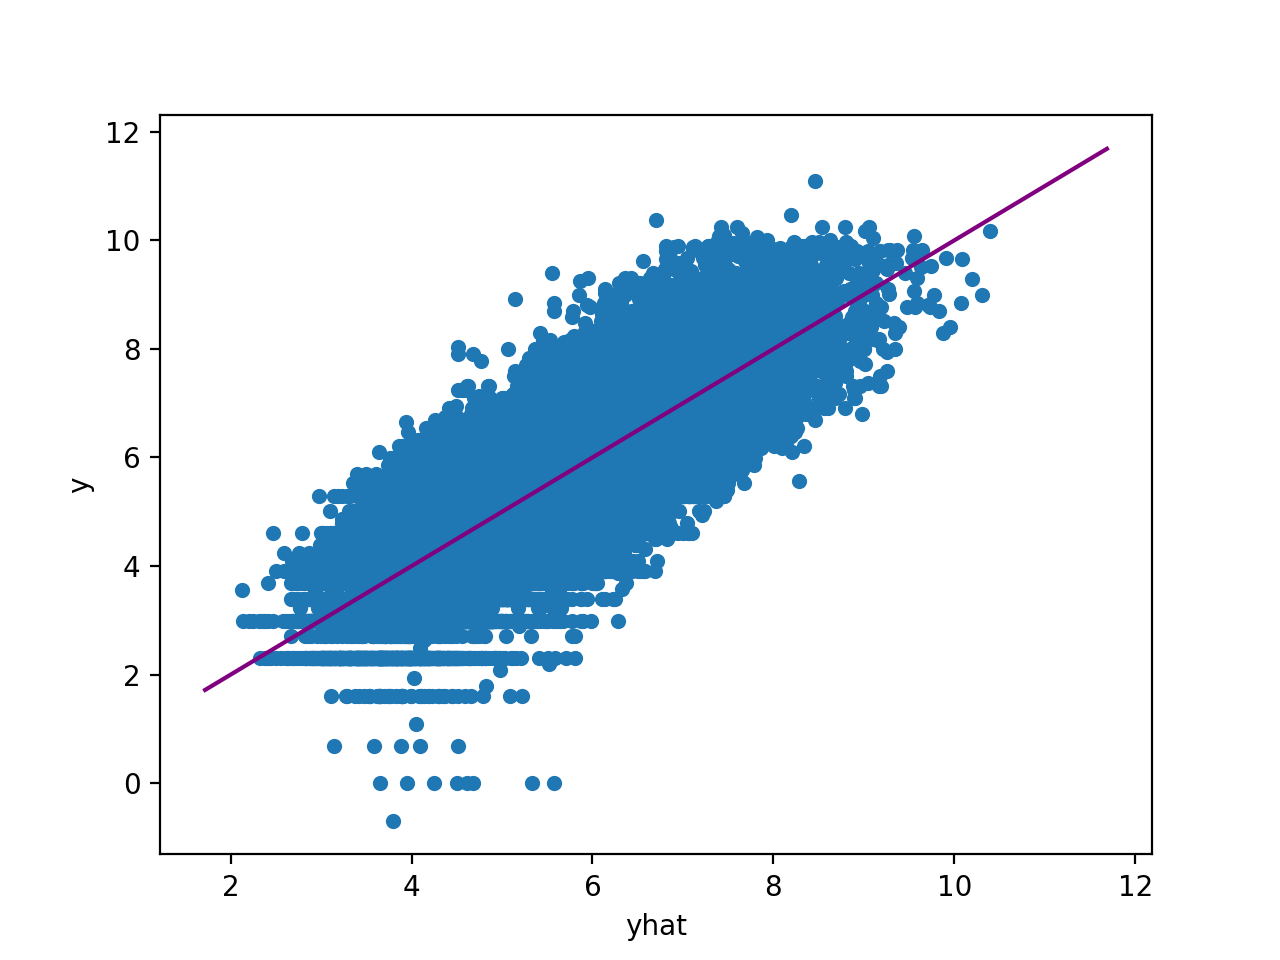

In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt
df = pd.DataFrame({'y':expenditures2,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax], color = 'purple')

### Parameter  
• Beta parameter: income elasticity

In [20]:
result.get_beta().sort_values()

j
Fish-Frozen                             0.246842
Other vegetables (fresh or canned)      0.253198
Garden eggs/egg plant                   0.257859
Okra-fresh                              0.295308
Pineapples                              0.295379
(Cocoyam, Spinach, etc)                 0.305324
Chicken                                 0.318017
Cassava flour                           0.321077
Goat                                    0.324849
Gari -Yellow                            0.326250
Milk tinned (unsweetened)               0.335286
Plantains                               0.336689
Okra-dried                              0.341528
Tomatoes                                0.341543
Beef                                    0.341884
Palm oil                                0.343210
Soft drinks (Coca cola, spirit etc)     0.343263
Yam-roots                               0.347992
Tomato puree(canned)                    0.352777
Orange/tangerine                        0.361425
Brown beans       

<IPython.core.display.Javascript object>


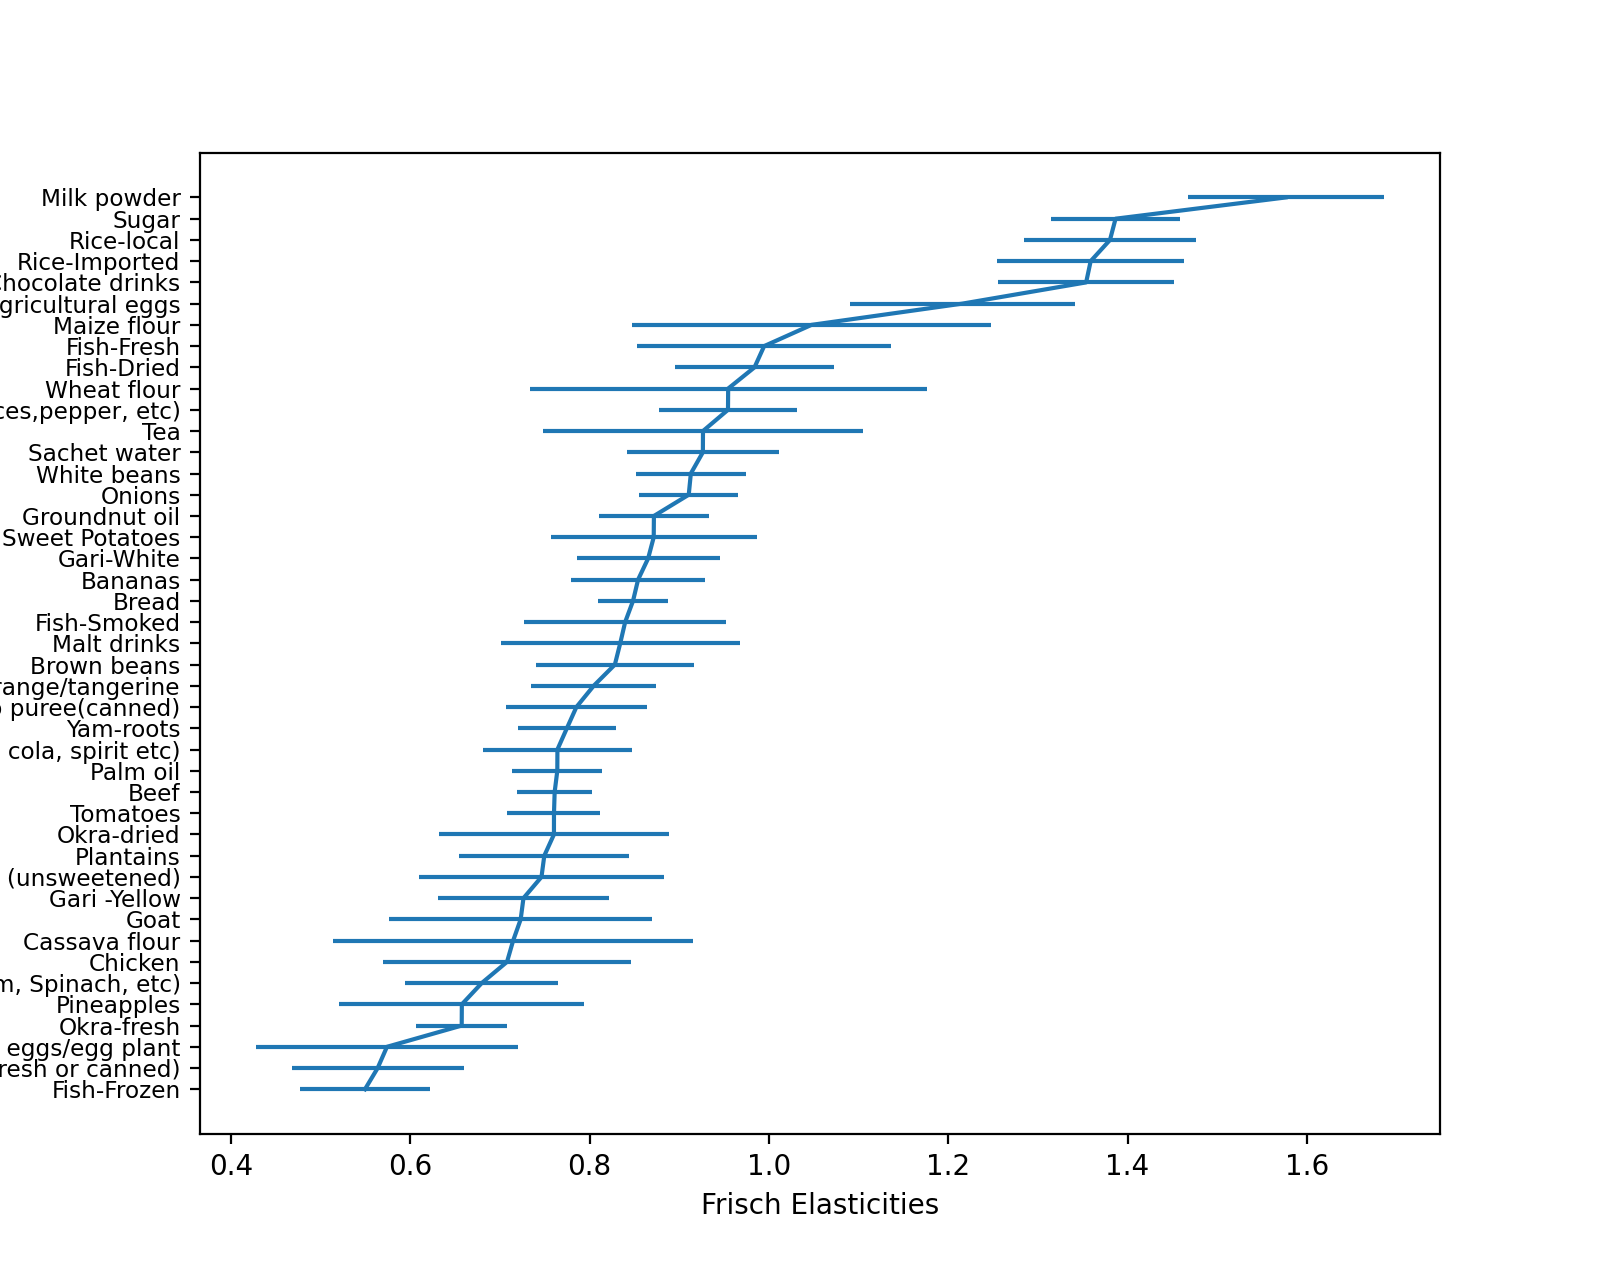

<IPython.core.display.Javascript object>


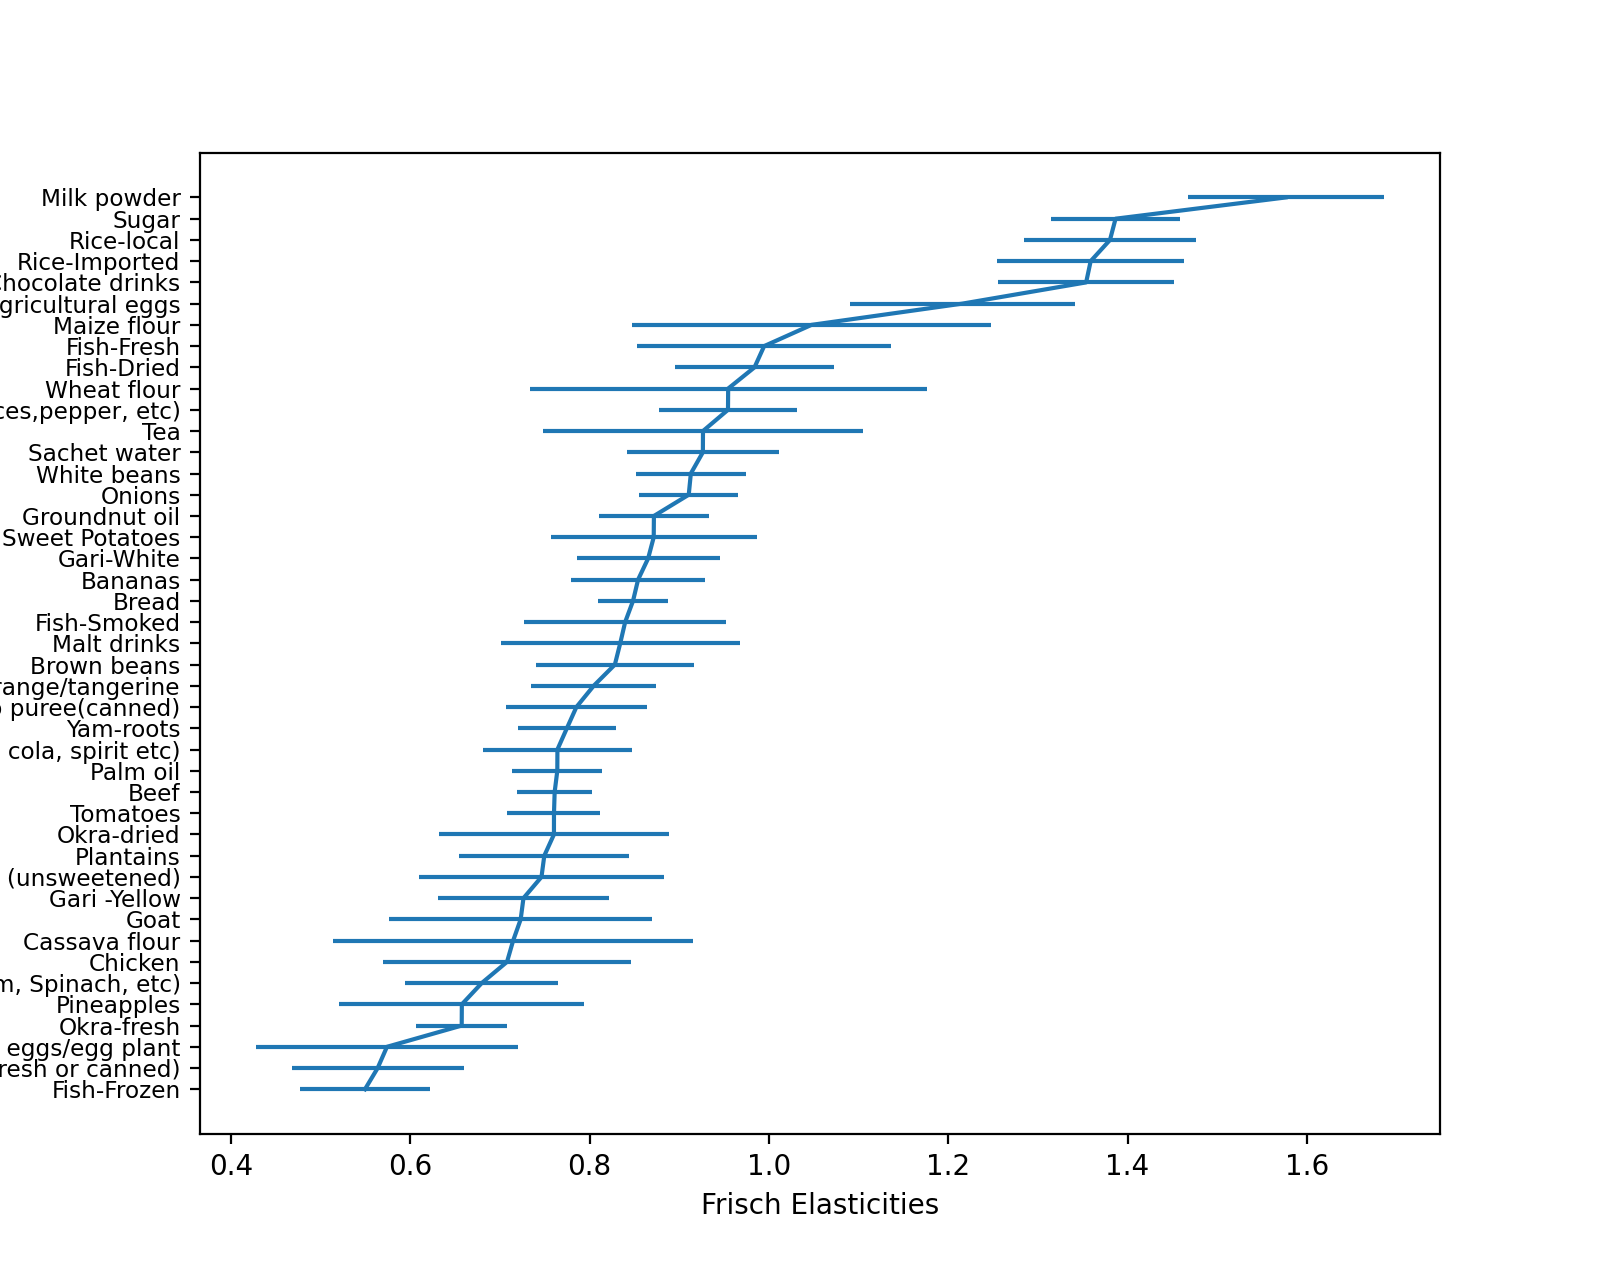

In [21]:
result.graph_beta()

#### Demand and Household Composition  
• Impact of household member on consumption of food

In [22]:
result.gamma

k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+,Constant
j,,,,,,,,,,,,,,,
"(Cocoyam, Spinach, etc)",-0.015192,0.012283,0.030412,-0.033765,0.048779,0.057815,0.101008,0.031863,0.028920,0.033931,0.048556,0.050374,0.070528,0.031611,-0.197808
Agricultural eggs,0.005273,0.047350,0.050232,0.015530,0.089903,0.219877,0.182996,0.053201,0.053745,0.019356,0.028243,0.094256,0.103635,-0.060144,-0.474118
Bananas,0.037509,0.019628,0.046346,0.056714,0.095653,0.124172,0.082554,0.023702,0.009165,0.050533,0.077732,0.056040,0.068480,-0.002241,-0.357297
Beef,0.035403,0.045631,0.032596,0.059631,0.084576,0.156356,0.147275,0.008473,0.033471,0.044356,0.055734,0.099305,0.059286,-0.004953,-0.434315
Bread,0.019121,0.050941,0.031611,0.056330,0.102693,0.172484,0.140703,0.016710,0.046773,0.063223,0.072251,0.102843,0.096053,0.017779,-0.442452
Brown beans,0.041103,0.073306,0.049682,0.065975,0.070143,0.130769,0.110357,0.041433,0.026002,0.061614,0.090390,0.073097,0.110112,0.060538,-0.388814
Cassava flour,0.003404,0.100233,0.033744,0.085940,0.066803,0.088818,0.074925,-0.067421,0.068931,-0.010453,0.085130,0.052734,0.093547,0.013511,-0.296914
Chicken,-0.007596,0.033497,-0.014040,0.032923,0.082972,0.133768,0.161904,-0.062432,0.011918,0.011559,0.042921,0.103479,0.126613,-0.005463,-0.526734
Chocolate drinks,0.067683,0.016802,0.045409,0.003374,0.071992,0.145705,0.183903,0.076143,0.037072,0.028193,0.077367,0.131429,0.080670,-0.002316,-0.368023


In [ ]:
#Save result
result.to_pickle('my_estimates.pickle')

import cfe
result = cfe.regression.read_pickle('my_estimates.pickle')

### Nutritional content of different foods
Here we collected the nutritional contents of 42 types of foods in regression analysis.

In [76]:
food_codes = pd.read_excel('Food Codes for Nigeria.xlsx')

In [45]:
food_codes

,Food description,From Country,FDC Comments,COICOP,COICOP Comments,USDA FDC ID,WAFCT ID,WAFCT Comments
0,Guinea corn/sorghum,NGA,"""Sorghum grain""",01.1.1.1.3,NaN,169716,01_039,NaN
1,Millet,NGA,"""Cooked millet""",01.1.1.1.5,NaN,168871,01_017,NaN
2,Maize,NGA,WHOLE KERNEL CORN MAIZE,01.1.1.1.6,NaN,1441697,01_004,NaN
3,Rice-local,NGA,"Rice, white, long-grain, regular, unenriched, ...",01.1.1.1.2,NaN,169757,01_065,NaN
4,Rice-Imported,NGA,"Rice, white, long-grain, regular, unenriched, ...",01.1.1.1.2,NaN,169757,01_037,NaN
...,...,...,...,...,...,...,...,...
91,Beer (local and imported),NGA,Beer,02.1.3.0,NaN,1104393,12_001,NaN
92,Palm wine,NGA,"Alcoholic beverage, wine, table, all",02.1.2.2,Wine from other sources (ND),173185,12_006,NaN
93,Pito,NGA,Beer,02.1.3.0,Beer,1104393,12_003,NaN
94,Gin,NGA,Gin,02.1.9.0,Other alcoholic beverages,1104487,NaN,None


In [77]:
fc = result.get_beta().to_frame()
table = food_codes.loc[:, ['Food description', 'USDA FDC ID']]

In [78]:
fc_table = fc.merge(table, left_on = 'j', right_on = 'Food description', how = 'inner')

In [79]:
fc_table

,beta,Food description,USDA FDC ID
0,0.679675,"(Cocoyam, Spinach, etc)",1320589
1,1.215686,Agricultural eggs,747997
2,0.854099,Bananas,1102653
3,0.761059,Beef,1098212
4,0.848466,Bread,325871
5,0.828217,Brown beans,747433
6,0.714741,Cassava flour,2505943
7,0.707930,Chicken,171116
8,1.353846,Chocolate drinks,1097616
9,0.954389,"Condiments,(salt,spices,pepper, etc)",1257188


In [73]:
apikey = "lxD6lWLfAtFMmMogo98BZyZakAnjLIADqzEbiTjs" 

In [80]:
import warnings
import fooddatacentral as fdc

D = {}
count = 0
for food in fc.index:
    try:
        FDC = fc_table.loc[fc_table['Food description']==food,'USDA FDC ID'].values[0]
        count+=1
        D[food] = fdc.nutrients(apikey,FDC).Quantity
        print(food)
    except AttributeError:
        warnings.warn(f"Couldn't find FDC Code {FDC} for food {food}." % (food,FDC))

D = pd.DataFrame(D,dtype=float)

D

(Cocoyam, Spinach, etc)
Agricultural eggs
Bananas
Beef
Bread
Brown beans
Cassava flour
Chicken
Chocolate drinks
Condiments,(salt,spices,pepper, etc)
Fish-Dried
Fish-Fresh
Fish-Frozen
Fish-Smoked
Garden eggs/egg plant
Gari -Yellow
Gari-White
Goat
Groundnut oil
Maize flour
Malt drinks
Milk powder
Milk tinned (unsweetened)
Okra-dried
Okra-fresh
Onions
Orange/tangerine
Other vegetables (fresh or canned)
Palm oil
Pineapples
Plantains
Rice-Imported
Rice-local
Sachet water
Soft drinks (Coca cola, spirit etc)
Sugar
Sweet Potatoes
Tea
Tomato puree(canned)
Tomatoes
Wheat flour
White beans
Yam-roots


,"(Cocoyam, Spinach, etc)",Agricultural eggs,Bananas,Beef,Bread,Brown beans,Cassava flour,Chicken,Chocolate drinks,"Condiments,(salt,spices,pepper, etc)",...,Sachet water,"Soft drinks (Coca cola, spirit etc)",Sugar,Sweet Potatoes,Tea,Tomato puree(canned),Tomatoes,Wheat flour,White beans,Yam-roots
Alanine,NaN,0.714,NaN,NaN,NaN,NaN,NaN,0.991,NaN,NaN,...,NaN,NaN,NaN,0.077,NaN,0.052,NaN,NaN,NaN,0.063
"Alcohol, ethyl",NaN,NaN,0.00,0.00,NaN,NaN,NaN,0.000,0.00,NaN,...,0.00,0.00,0.00,0.000,NaN,0.000,0.00,NaN,NaN,0.000
Amino acids,NaN,0.000,0.00,0.00,NaN,NaN,NaN,0.000,0.00,NaN,...,0.00,0.00,0.00,0.000,NaN,0.000,0.00,NaN,NaN,0.000
Arginine,NaN,0.691,NaN,NaN,NaN,NaN,NaN,1.128,NaN,NaN,...,NaN,NaN,NaN,0.055,NaN,0.032,NaN,NaN,NaN,0.127
Ash,NaN,0.650,NaN,NaN,2.10,NaN,NaN,1.170,NaN,NaN,...,NaN,NaN,0.01,0.990,NaN,1.280,NaN,NaN,NaN,0.820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vitamin K (Menaquinone-4),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vitamin K (phylloquinone),NaN,NaN,0.50,1.70,NaN,NaN,NaN,0.800,0.20,NaN,...,0.00,0.00,0.00,1.800,NaN,3.400,7.90,NaN,NaN,2.300
Vitamins and Other Components,NaN,0.000,0.00,0.00,0.00,NaN,NaN,0.000,0.00,NaN,...,0.00,0.00,0.00,0.000,NaN,0.000,0.00,NaN,NaN,0.000
Water,NaN,86.300,74.91,62.58,35.70,0.00,NaN,73.240,78.43,NaN,...,99.90,89.36,0.02,77.280,NaN,87.880,94.52,NaN,0.00,69.600


### Household Nutritional Adequacy

In [86]:
#calculate household recommended intake
hh_characteristics = hh_characteristics[rdi.columns.tolist()]

hh_rdi = hh_characteristics@rdi.T

In [87]:
hh_rdi

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Magnesium,Niacin,Phosphorus,Potassium,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Vitamin E,Vitamin K,Zinc
i,t,m,,,,,,,,,,,,,,,,,,,,
10001,2010,Nigeria,13400.0,319.0,187.6,2550.0,6700.0,910.0,85.0,2270.0,96.0,4660.0,31200.0,7.7,7.4,5100.0,15.3,8.3,510.0,96.0,660.0,60.0
10002,2010,Nigeria,14400.0,336.0,201.6,2700.0,7600.0,910.0,89.0,2410.0,102.0,6000.0,32700.0,8.1,7.8,5400.0,16.2,8.8,525.0,101.0,645.0,65.0
10003,2010,Nigeria,10800.0,241.0,151.2,2000.0,6900.0,780.0,63.0,1760.0,78.0,5650.0,26900.0,6.1,5.9,4100.0,12.0,6.9,355.0,74.0,460.0,51.0
10004,2010,Nigeria,5400.0,136.0,75.6,1100.0,3500.0,390.0,24.0,980.0,42.0,2650.0,13900.0,3.3,3.2,2200.0,6.6,4.2,210.0,41.0,270.0,27.0
10006,2010,Nigeria,6600.0,158.0,92.4,1200.0,3000.0,390.0,34.0,1130.0,46.0,2100.0,14100.0,3.7,3.5,2500.0,7.2,3.9,255.0,45.0,330.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379146,2018,Nigeria,8200.0,214.0,114.8,1600.0,4200.0,520.0,32.0,1560.0,62.0,2800.0,18800.0,5.0,4.7,3400.0,9.6,5.8,345.0,60.0,450.0,41.0
379148,2018,Nigeria,2400.0,56.0,33.6,400.0,1000.0,130.0,8.0,400.0,16.0,700.0,4700.0,1.3,1.2,900.0,2.4,1.3,90.0,15.0,120.0,11.0
379151,2018,Nigeria,9200.0,216.0,128.8,1800.0,5900.0,650.0,57.0,1580.0,68.0,5150.0,23100.0,5.2,5.1,3500.0,10.8,6.2,320.0,67.0,405.0,44.0


### Factors affecting food demand

In [89]:
!pip install wbdata
import wbdata
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt
cf.go_offline()

  Using cached wbdata-0.3.0-py3-none-any.whl (14 kB)


/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning:

The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



In [108]:
def indicators_df(code,name):
    variable_labels = {code:name}
    NGA = wbdata.get_dataframe(variable_labels, country="NGA").sort_values('date')

    return NGA

def plot_indicators(code,name):
    world = indicators_df(code,name)

    date = np.asarray(world['date'].values, float)
    nga = world.values

    plt.figure(figsize=(14,9))
    plt.plot(date,nga)
    plt.title(name,fontweight="bold")
    plt.xlabel("Date")
    plt.ylabel("Variable")
    plt.ylim(ymin=0)

In [128]:
code = "NY.GNP.PCAP.CD"
name = "GNI per capita"
world = indicators_df(code,name)
world

,GNI per capita
date,
1960,NaN
1961,NaN
1962,100.0
1963,110.0
1964,110.0
...,...
2017,2070.0
2018,1980.0
2019,2050.0


<IPython.core.display.Javascript object>


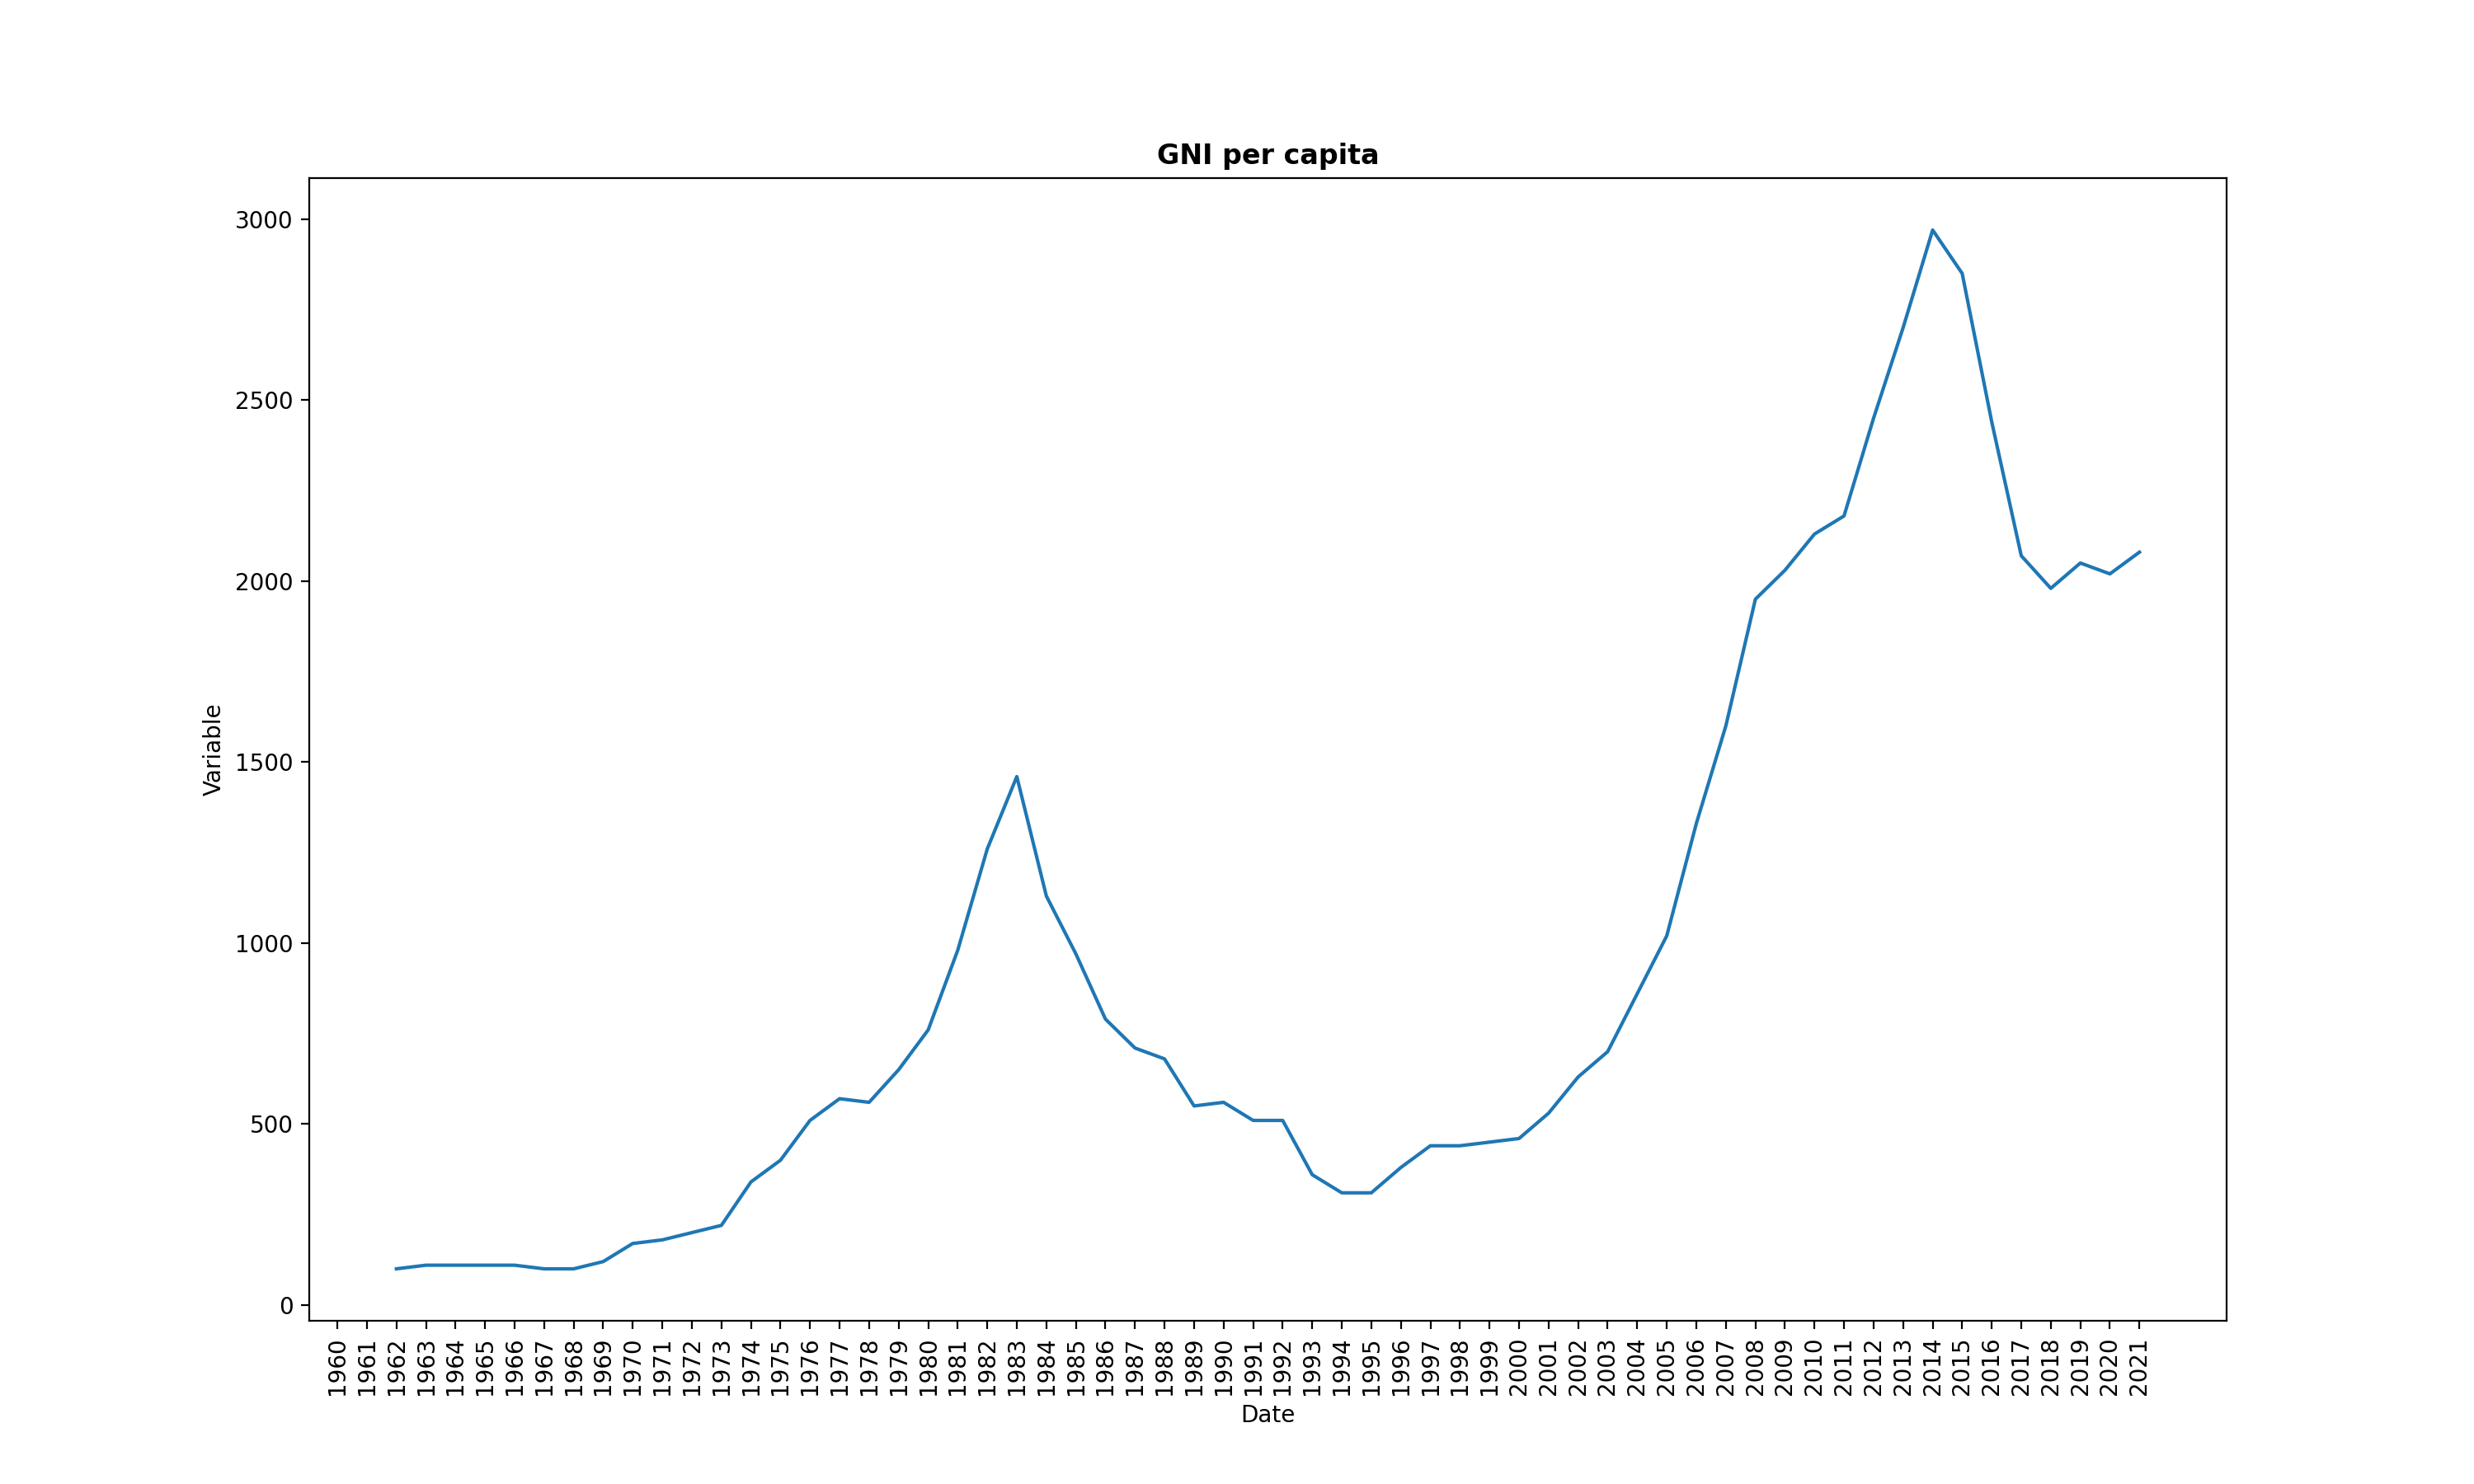

([<matplotlib.axis.XTick at 0x7ff883e60610>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

In [127]:
plt.figure(figsize=(15,9))
plt.plot(world)
plt.title(name,fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Variable")
plt.xticks(world.index, rotation='vertical')